# MRI nibabel on IXI brain T1-weighted Dataset

IXI dataset has a total of 584 volumes. The 3D representations have 3 dimensions, height, width, and depth. `NIfTI` format images and `Nibabel` library will be introduced.

In [15]:
import nibabel as nib
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import HTML

## List all the files from IXI T1 dataset

In [16]:
files = glob('../../../Dataset/IXI_MRI_Dataset/IXI-T1_2/*.gz')
len(files), files[0]

(581, '../../../Dataset/IXI_MRI_Dataset/IXI-T1_2\\IXI002-Guys-0828-T1.nii.gz')

## Load one example volume

In [17]:
vol = nib.load(files[0])
type(vol)

nibabel.nifti1.Nifti1Image

In [18]:
h = vol.header
print(h)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.9375    0.9375    1.199997  0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'MR'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.468175
quatern_c       : -0.5299171
quatern_d       : -0.468175
qoffset_x       : -88.63989
qoffset_y       : 116.

In [19]:
print('Shape:', h.get_data_shape())
print('Voxel sizes in millimeters: ', h.get_zooms())
print('Type: ',h.get_data_dtype())

Shape: (256, 256, 150)
Voxel sizes in millimeters:  (0.9375, 0.9375, 1.199997)
Type:  int16


## Convert from NIfTI to Numpy Array

In [20]:
# using get_fdata() to convert to ndarray with float64
vol_array = vol.get_fdata()
type(vol_array), vol_array.dtype, vol_array.shape

(numpy.ndarray, dtype('float64'), (256, 256, 150))

## Slicing

In [21]:
vol_cropped_array = vol.slicer[:, :, 30: 120].get_fdata()
type(vol_cropped_array), vol_cropped_array.dtype, vol_cropped_array.shape

(numpy.ndarray, dtype('float64'), (256, 256, 90))

## Inspect all images sizes

In [22]:
dict_size = {}
dict_size[0] = {}
dict_size[1] = {}
dict_size[2] = {}

dict_voxel_size = {}
dict_voxel_size[0] = {}
dict_voxel_size[1] = {}
dict_voxel_size[2] = {}

for file in files:
    act_vol = nib.load(file)

    sh = act_vol.get_fdata().shape
    dict_size[0][sh[0]] = 1 + dict_size[0].get(sh[0], 0)
    dict_size[1][sh[1]] = 1 + dict_size[1].get(sh[1], 0)
    dict_size[2][sh[2]] = 1 + dict_size[2].get(sh[2], 0)

    vx_size = act_vol.header.get_zooms()
    dict_voxel_size[0][vx_size[0]] = 1 + dict_voxel_size[0].get(vx_size[0], 0)
    dict_voxel_size[1][vx_size[1]] = 1 + dict_voxel_size[1].get(vx_size[1], 0)
    dict_voxel_size[2][vx_size[2]] = 1 + dict_voxel_size[2].get(vx_size[2], 0)

dict_size

{0: {256: 581}, 1: {256: 581}, 2: {150: 503, 140: 2, 130: 2, 146: 74}}

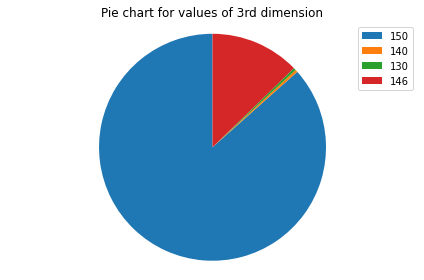

In [23]:
labels = list(dict_size[2].keys())
sizes = list(dict_size[2].values())

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('Pie chart for values of 3rd dimension')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Show 2D slice from volumes

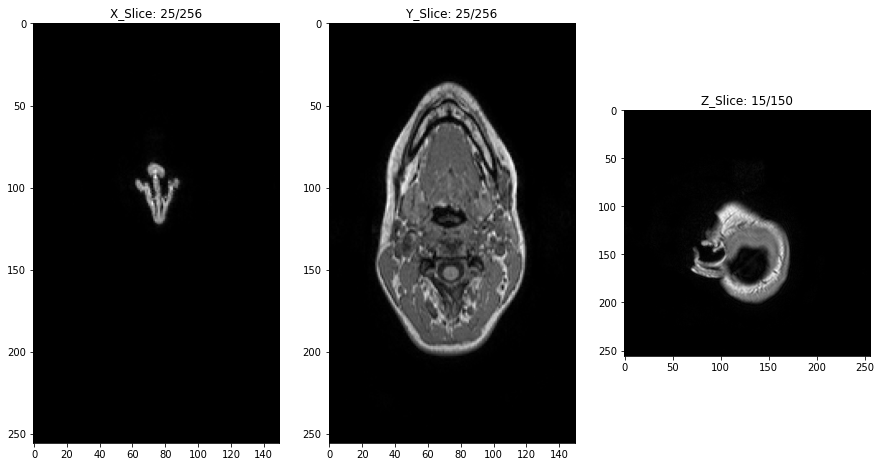

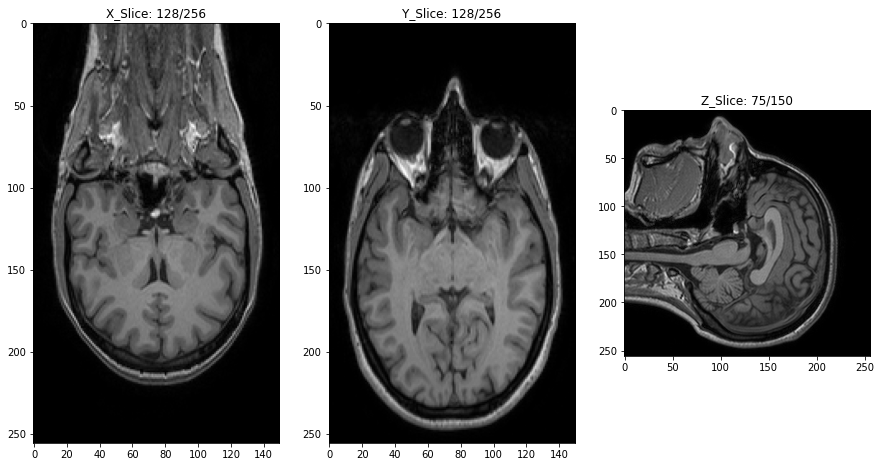

In [24]:
def draw_volume(volume=vol, percentage=0.5):
    plt.figure(figsize=[15, 15])

    if isinstance(volume, str):
        volume = nib.load(volume)

    i_x = int(np.floor(volume.shape[0] * percentage))
    i_y = int(np.floor(volume.shape[1] * percentage))
    i_z = int(np.floor(volume.shape[2] * percentage))

    slice_x = np.squeeze(volume.slicer[i_x:i_x+1,:,:].get_fdata())
    slice_y = np.squeeze(volume.slicer[:,i_y:i_y+1,:].get_fdata())
    slice_z = np.squeeze(volume.slicer[:,:,i_z:i_z+1].get_fdata())

    plt.subplot(131)
    plt.imshow(slice_x, cmap='gray')
    plt.title('X_Slice: {}/{}'.format(i_x, volume.shape[0]))

    plt.subplot(132)
    plt.imshow(slice_y, cmap='gray')
    plt.title('Y_Slice: {}/{}'.format(i_y, volume.shape[1]))

    plt.subplot(133)
    plt.imshow(slice_z, cmap='gray')
    plt.title('Z_Slice: {}/{}'.format(i_z, volume.shape[2]))

    plt.show()

draw_volume(files[0],0.1)
draw_volume(files[0],0.5)

interactive(children=(Dropdown(description='volume', options=('../../../Dataset/IXI_MRI_Dataset/IXI-T1_2\\IXI0…

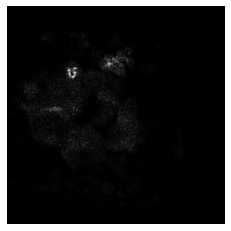

In [25]:
from ipywidgets import interact_manual , FloatSlider

interact_manual(draw_volume,
         volume = files,
         percentage = FloatSlider(min=0, max=0.999, step=0.005),
        );

def show_animation(train=True):
    images = nib.load(files[0]).get_fdata()
    images = np.moveaxis(images, 2,0)
    fig = plt.figure()
    ims = list()
    for image in images:
        img = plt.imshow(image,cmap='gray',animated=True)
        plt.axis('off')
        ims.append([img])
    ani = animation.ArtistAnimation(fig,ims,interval=100,blit=False,repeat_delay=1000)
    return ani

ani = show_animation()

In [26]:
HTML(ani.to_jshtml())